
# Number of Voice Captures per Session


## 0. Importing libraries and FRVRS logs dataframe and creating voices capture dataframe

In [1]:

%pprint
import sys
if (osp.join('..', 'py') not in sys.path): sys.path.insert(1, osp.join('..', 'py'))

Pretty printing has been turned OFF


In [2]:

from FRVRS import (nu, fu, DataFrame, display)
import os
import humanize

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(842663, 112)


In [6]:

# Number of Voice Captures per Session
if nu.pickle_exists('voices_captured_df'):
    voices_captured_df = nu.load_object('voices_captured_df')
else:
    
    # Initialize an empty list to store the data for each session
    rows_list = []
    
    # Loop through each unique UUID and scene combination
    for (session_uuid, scene_id), scene_df in frvrs_logs_df.groupby(fu.scene_groupby_columns):
        
        # Create a dictionary to store the logger version, scene categories, and other data for the current group
        row_dict = {}
        for cn in fu.scene_groupby_columns: row_dict[cn] = eval(cn)
        row_dict['logger_version'] = fu.get_logger_version(scene_df)
        row_dict['is_scene_aborted'] = fu.get_is_scene_aborted(scene_df)
        row_dict['scene_type'] = fu.get_scene_type(scene_df)
        row_dict['voices_captured'] = fu.get_voice_capture_count(scene_df)
        
        # Append the dictionary to the list of rows
        rows_list.append(row_dict)
    
    # Create a data frame from the list of dictionaries
    voices_captured_df = DataFrame(rows_list)
    nu.store_objects(voices_captured_df=voices_captured_df)

Pickling to C:\Users\DaveBabbitt\Documents\GitHub\itm-analysis-reporting\saves\pkl\voices_captured_df.pkl


In [7]:

voices_captured_df.sort_values('voices_captured')

,session_uuid,scene_id,logger_version,is_scene_aborted,scene_type,voices_captured
666,91a84c6a-ba27-4116-8644-e5373b3588de,0,1.3,False,Triage,0
232,2faaa766-35d7-4fff-910c-f7b044bb913b,2,1.3,False,Triage,0
998,e2ddf563-3583-404c-917a-8eb7bec38471,0,1.0,False,Orientation,0
1001,e2e599c8-8e48-487f-9f95-a0a382432ca5,0,1.0,False,Orientation,0
483,6909d3b6-a43a-4d26-8c83-9bd8a5ea569f,0,1.0,False,Orientation,0
...,...,...,...,...,...,...
544,7407aba4-aef4-4012-be6c-a237d225809d,2,1.0,False,Triage,140
85,0fb12cf8-dcf5-4110-b090-3b3271e9add6,2,1.3,False,Triage,140
635,89c48e7e-780f-4f1b-a846-fc0f4fd9841c,1,1.0,False,Triage,144
97,13839608-6085-4a88-a8f2-74af9fd06a05,2,1.3,False,Triage,151


In [8]:

# Get average number of voices captured (this could be including the ones that wave, walk, put hands up)
mask_series = (voices_captured_df.scene_type == 'Triage') & (voices_captured_df.is_scene_aborted == False)
ave_voices_captured = round(voices_captured_df[mask_series].voices_captured.mean(), 2)
print(f'The average number of voices captured per scene is {ave_voices_captured}.')

The average number of voices captured per scene is 38.54.


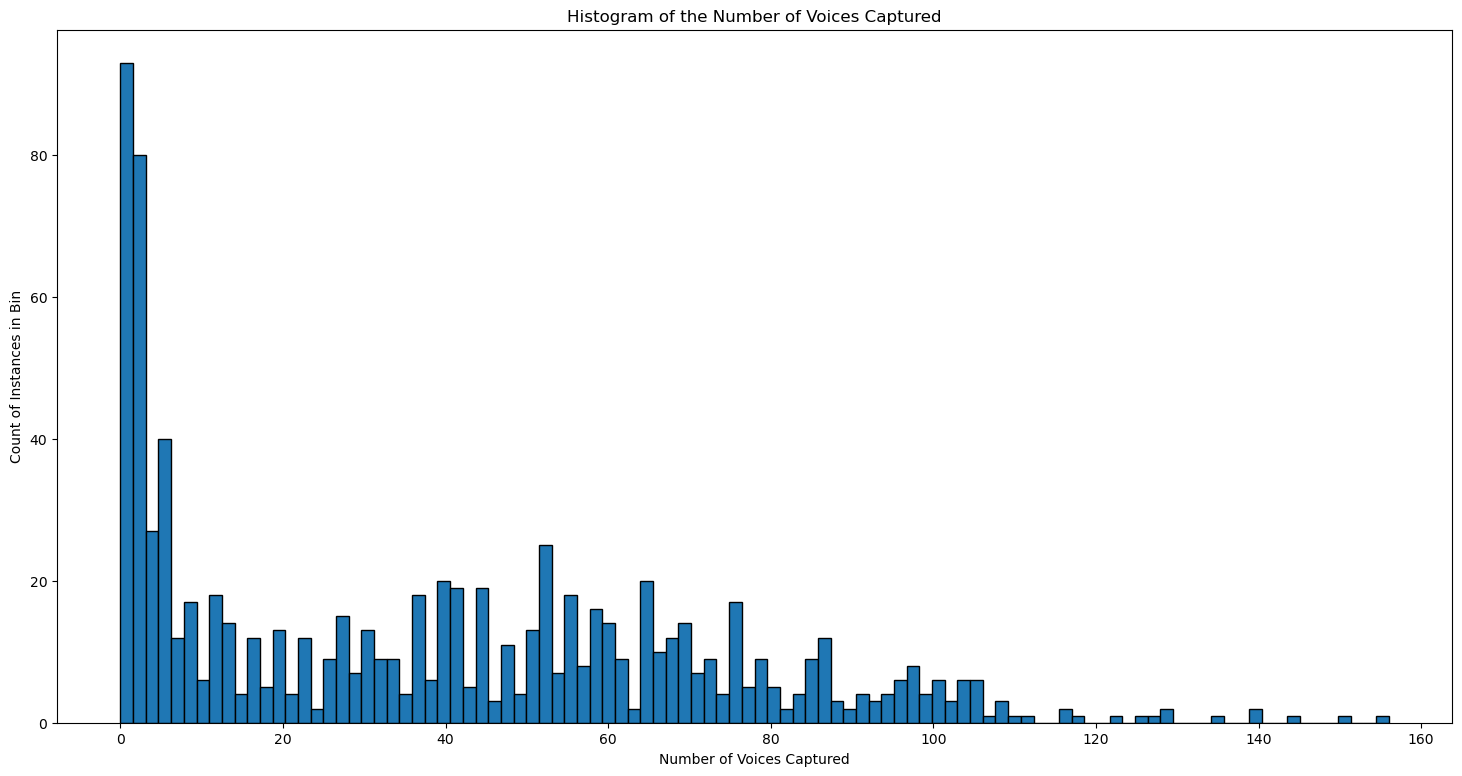

In [9]:

# Histogram of the number of voices captured per UUID
xlabel = 'Number of Voices Captured'
get_xtick_text = lambda text_obj: humanize.intword(
    int(text_obj.get_position()[0])
)
title = f'Histogram of the {xlabel}'
mask_series = (voices_captured_df.scene_type == 'Triage') & (voices_captured_df.is_scene_aborted == False)
fig = nu.plot_histogram(voices_captured_df[mask_series], 'voices_captured', xlabel=xlabel, xtick_text_fn=get_xtick_text, title=title)

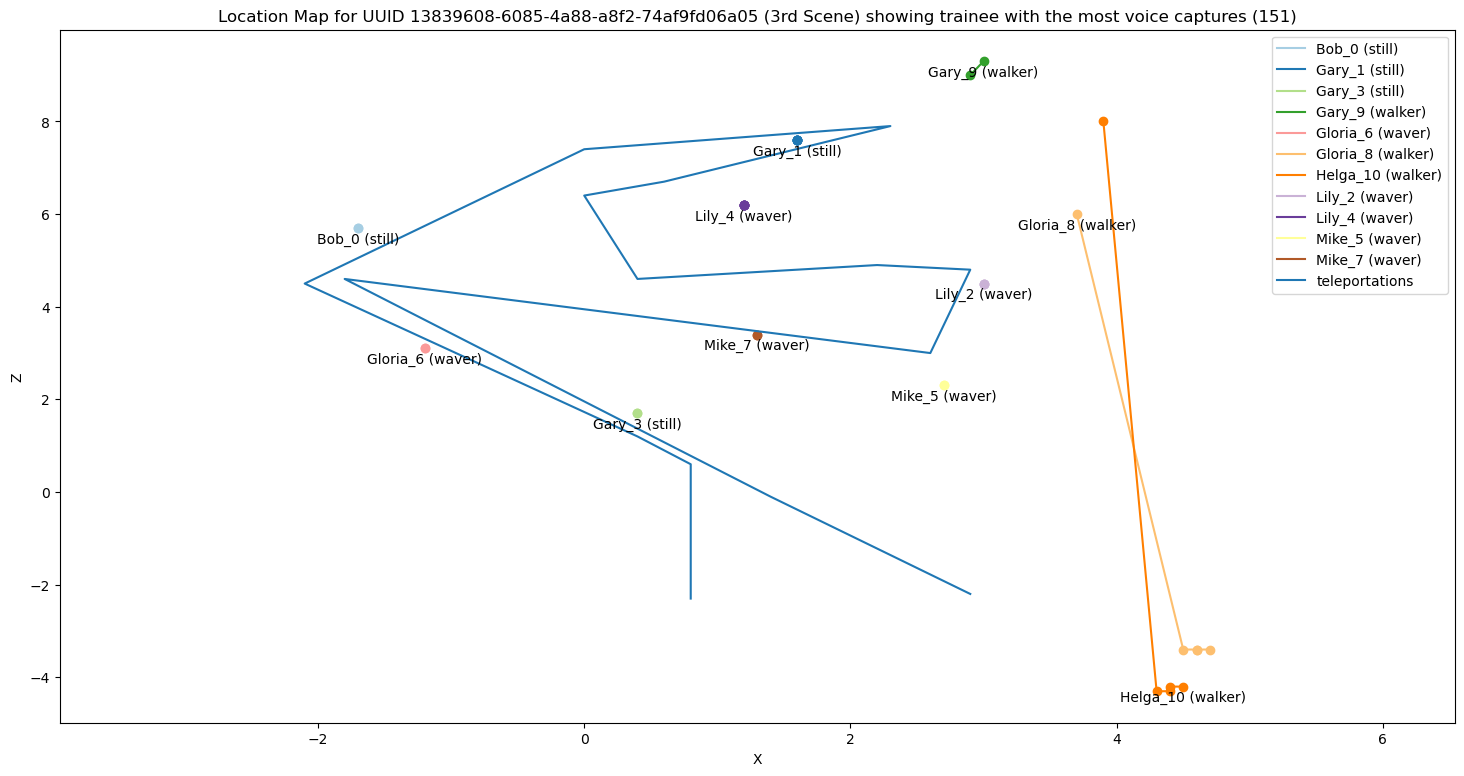

In [8]:

# Get scene with the most voice captures, v1.3
mask_series = (voices_captured_df.logger_version == 1.3)
fu.visualize_extreme_player_movement(
    frvrs_logs_df, voices_captured_df, 'voices_captured', mask_series=mask_series, is_ascending=False,
    humanize_type='intword', title_str='most voice captures', verbose=False
)

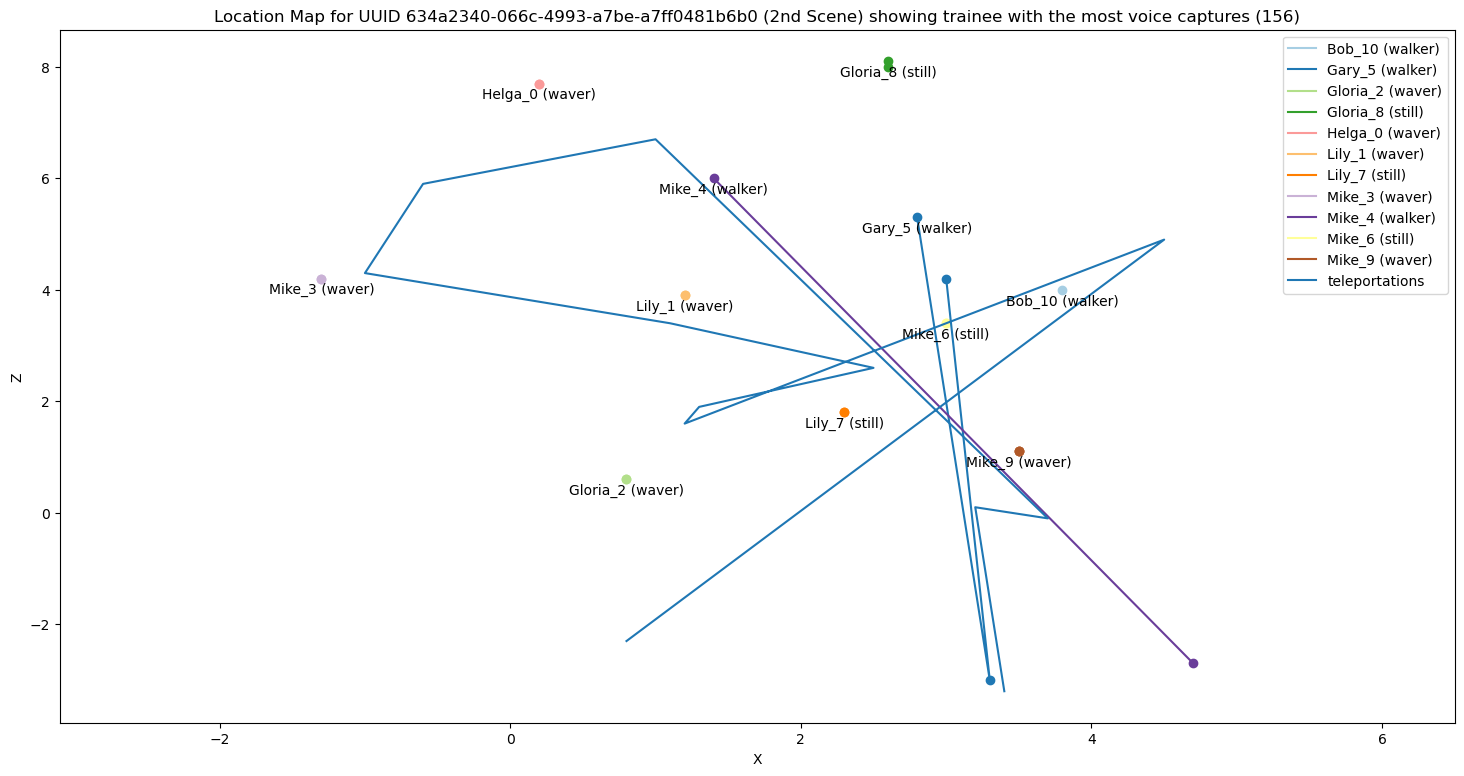

In [9]:

# Get scene with the most voice captures, v1.0
mask_series = (voices_captured_df.logger_version == 1.0)
fu.visualize_extreme_player_movement(
    frvrs_logs_df, voices_captured_df, 'voices_captured', mask_series=mask_series, is_ascending=False,
    humanize_type='intword', title_str='most voice captures', verbose=False
)

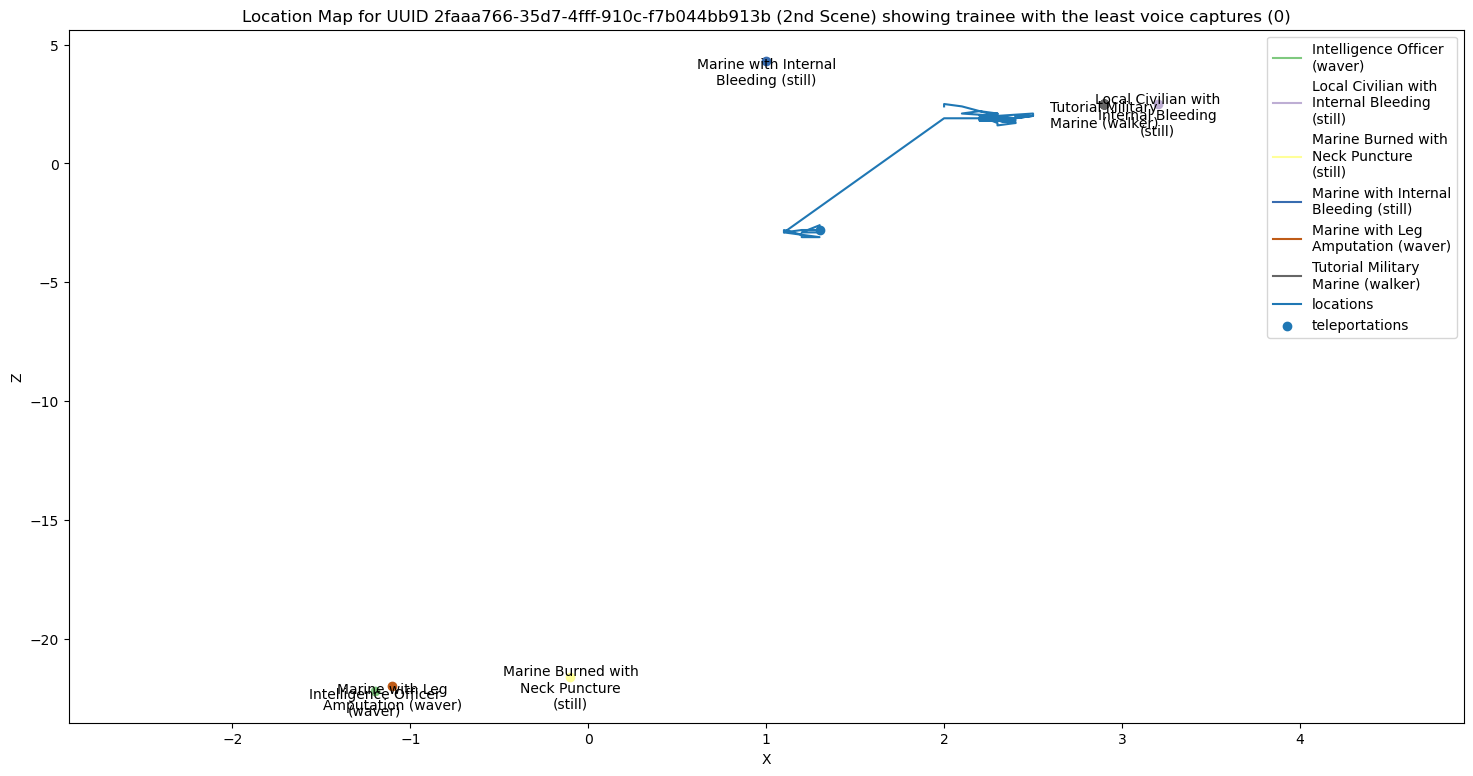

In [10]:

# Get scene with the least voice captures, v1.3
mask_series = (voices_captured_df.logger_version == 1.3)
fu.visualize_extreme_player_movement(
    frvrs_logs_df, voices_captured_df, 'voices_captured', mask_series=mask_series, is_ascending=True,
    humanize_type='intword', title_str='least voice captures', verbose=False
)

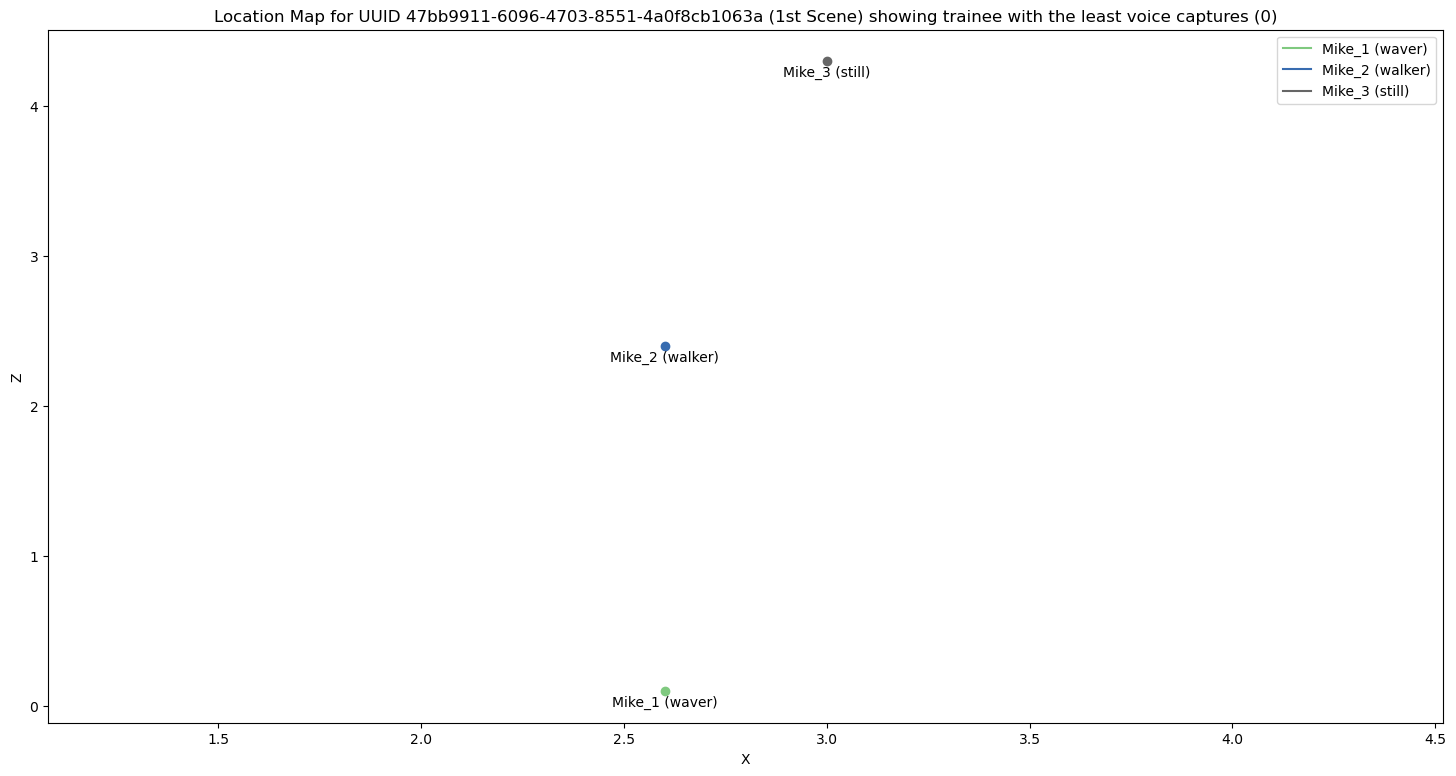

In [11]:

# Get scene with the least voice captures, v1.0
mask_series = (voices_captured_df.logger_version == 1.0)
fu.visualize_extreme_player_movement(
    frvrs_logs_df, voices_captured_df, 'voices_captured', mask_series=mask_series, is_ascending=True,
    humanize_type='intword', title_str='least voice captures', verbose=False
)


## How many patients are treated between the walk and wave commands?

In [12]:

mask_series = frvrs_logs_df.voice_command_command_description.map(
    lambda x: ('walk' in str(x).lower()) or ('wave' in str(x).lower())
)
frvrs_logs_df[mask_series].voice_command_command_description.unique().tolist()[:10]

['so you know i would walk in see those four patients i would go and say if anybody can hear me i want you to WLK over here OK', "you use your your global sort commands and then then you'll teleport so go ahead and do that WAVE command OK everybody can hear me wave", 'wave', 'alright everybody can hear me walk this way', 'walk', 'two walkers everybody can hear me wave', "if anybody can walk i want you to walk over here and then once your walkers are out of the way then you're gonna go and say if anyone can wave i want you to wave and then you're gonna know who your patients are that can't follow commands OK if in real life if you come up to somebody that had a complete amputation", 'anybody that can walk walk over here', 'anybody that can wave wave', '15 minutes away OK anybody that can hear me and stand up and walk come over here']

In [13]:

# Display a sample of the data frame, dropping columns with all NaN values and transposing it
mask_series = frvrs_logs_df.voice_command_command_description.isin(['walk', 'wave'])
df = frvrs_logs_df[mask_series]
display(df.sample(min(4, df.shape[0])).dropna(axis='columns', how='all').T)

,536792,686717,741744,758639
action_type,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND
action_tick,370199,1265963,539475,29466
event_time,2022-03-15 13:22:58,2023-05-16 16:36:00,2023-05-09 10:21:00,2023-05-09 08:53:00
session_uuid,9f03c005-21d8-4934-8bb9-7152347726d1,724fdf45-3165-43b8-b9ca-dc07102d2886,52e2653e-2230-4d8a-929b-e2a12dcb56c4,8f6097ce-795d-483a-a811-e6a5423bc59d
file_name,Disaster Day 2022/PA_132.csv,v.1.0/Clean 724fdf45-3165-43b8-b9ca-dc07102d28...,v.1.0/clean-52e2653e-2230-4d8a-929b-e2a12dcb56...,v.1.0/clean-8f6097ce-795d-483a-a811-e6a5423bc5...
logger_version,1.3,1.0,1.0,1.0
scene_id,2,5,2,1
voice_command_message,walk to the safe area,walk to the safe area,wave if you can,wave if you can
voice_command_command_description,walk,walk,wave,wave
